# Polynomial Curve Fitting

In [1]:
# general purpose python
import collections
import datetime
import glob
import importlib
import itertools
import json
import math
import os
import pickle
import random
import re
import shutil
import sys
import time
import warnings

# general purpose data science
import IPython
import ipywidgets as ipw
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs
import pylab
import scipy
import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm

# computer vision
import cv2
import imageio
import PIL
from PIL import *

# deep learning
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

# geospatial
import rasterio as rio
import rasterio.features

warnings.filterwarnings('ignore')

np.random.seed(1337)

mpl.rcParams['figure.dpi'] = 400

IPython.core.display.display(IPython.core.display.HTML("<style>.container { width:100% !important; }</style>"))

pd.options.display.max_colwidth = 32
pd.options.display.float_format = '{:,.6f}'.format
pd.options.display.expand_frame_repr = False

%matplotlib inline

sns.set(font_scale=1.3)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

plotly.offline.init_notebook_mode(connected=True)
plotly.io.templates.default = 'plotly_white'

In [2]:
fsize=(25.0, 15.0)
linewidth = 1.5
dotsize = 20

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

### Define the True Function and Generate the Sample Data

In [4]:
def f(x):
    return math.sin(x)
print(f(math.pi / 2))

1.0


In [5]:
f_points = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
f_points['y'] = f_points.x.apply(f)

In [6]:
num_points = 30

In [7]:
train = pd.DataFrame({'x': np.linspace(0, math.pi * 2, num_points)})
train['y'] = train.x.apply(lambda x: f(x) + (np.random.randn() * 0.2))

In [8]:
test = pd.DataFrame({'x': np.linspace(0, math.pi * 2, num_points)})
test['y'] = test.x.apply(lambda x: f(x) + (np.random.randn() * 0.2))

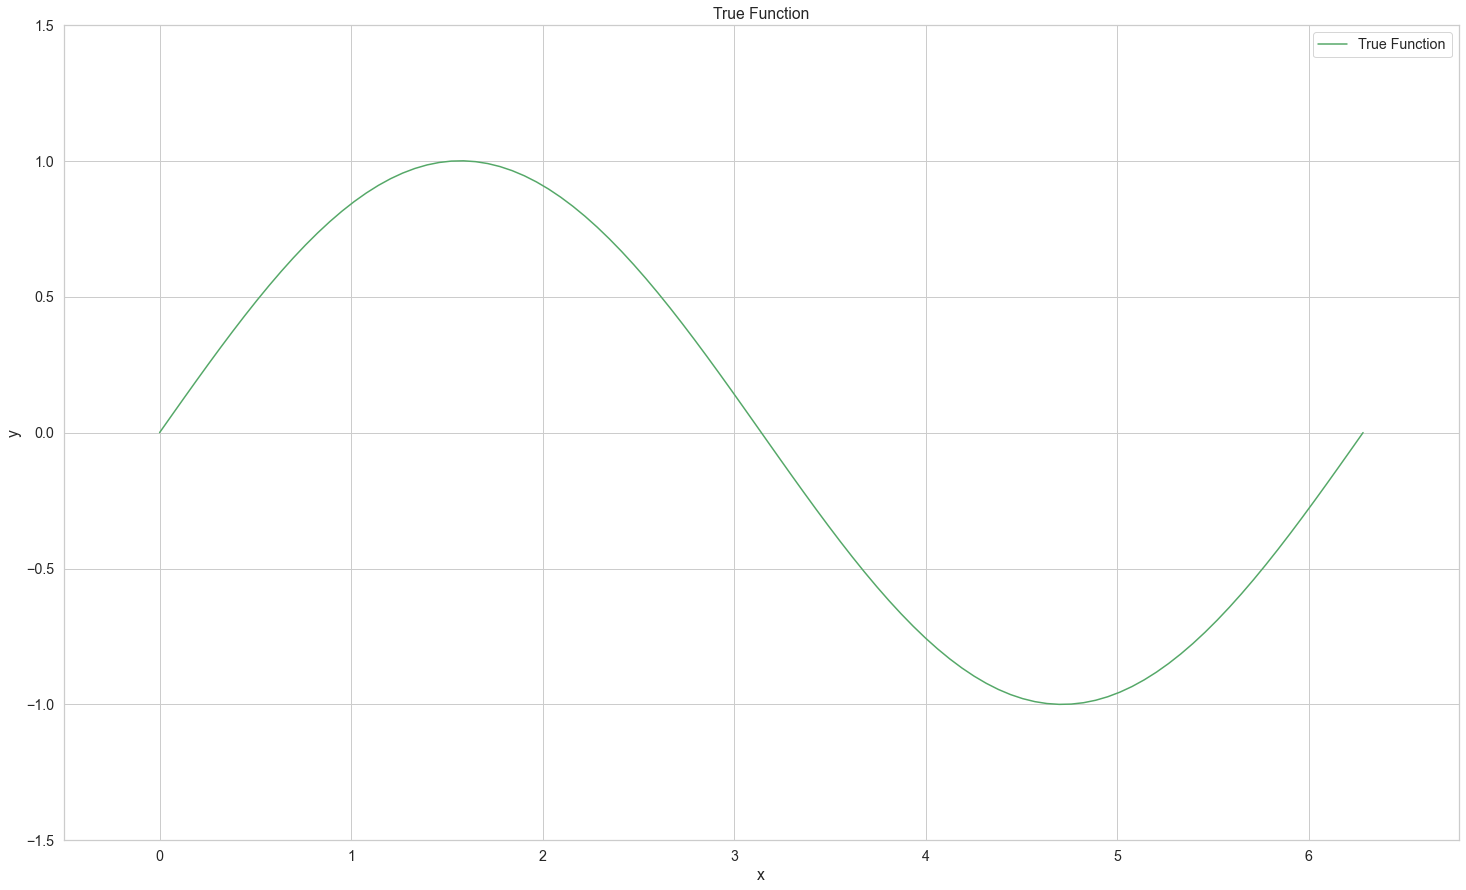

In [9]:
_ = plt.figure(figsize=fsize)
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=linewidth, label='True Function')
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True Function')
_ = plt.legend(loc='upper right')

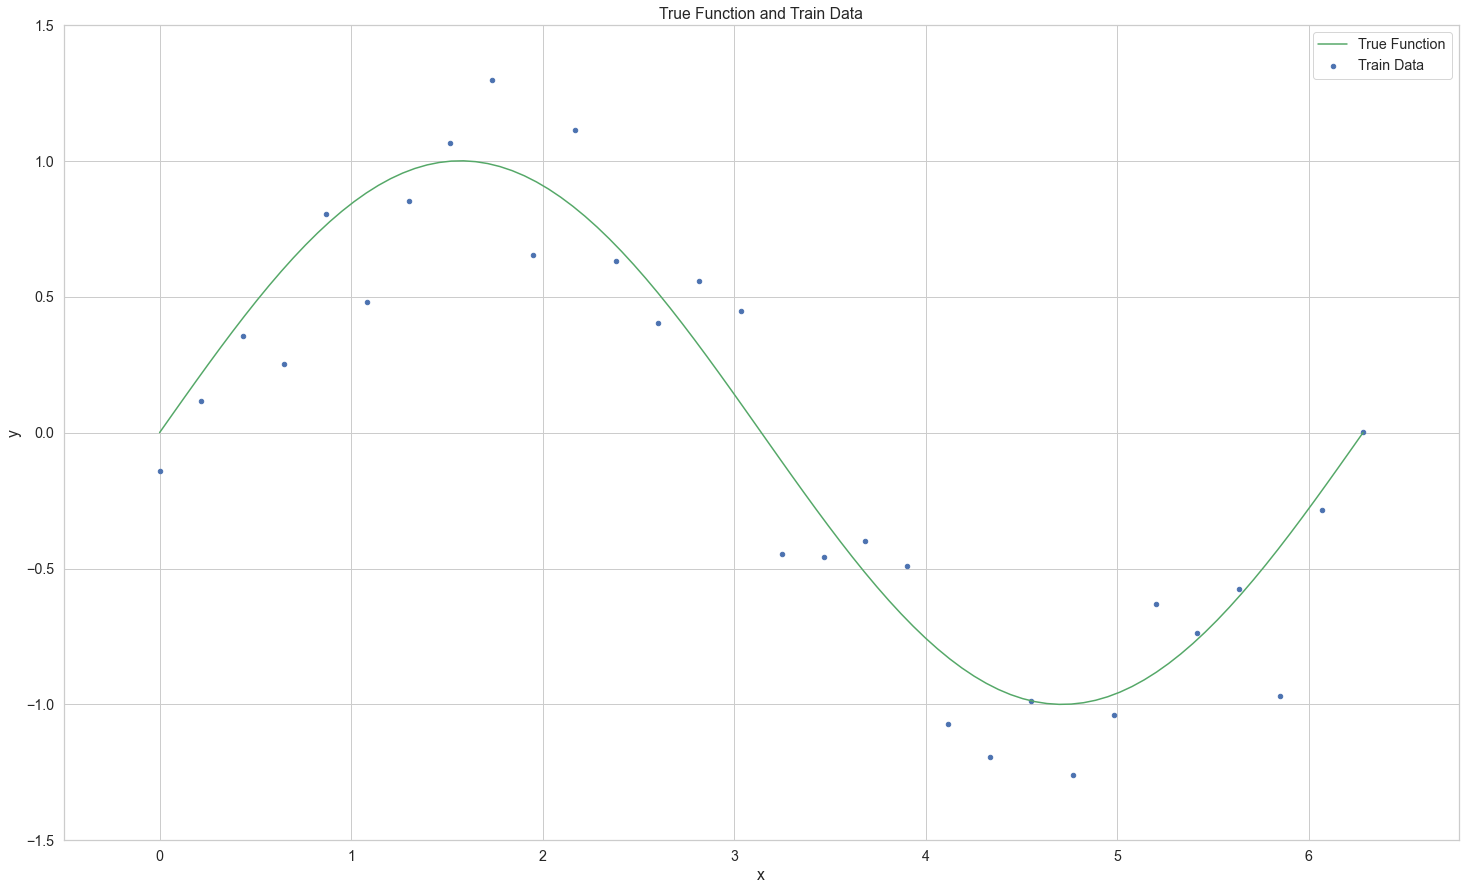

In [10]:
_ = plt.figure(figsize=fsize)
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=linewidth, label='True Function')
_ = plt.scatter(train.x, train.y, color='b', marker='o', s=dotsize, label='Train Data')
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True Function and Train Data')
_ = plt.legend(loc='upper right')

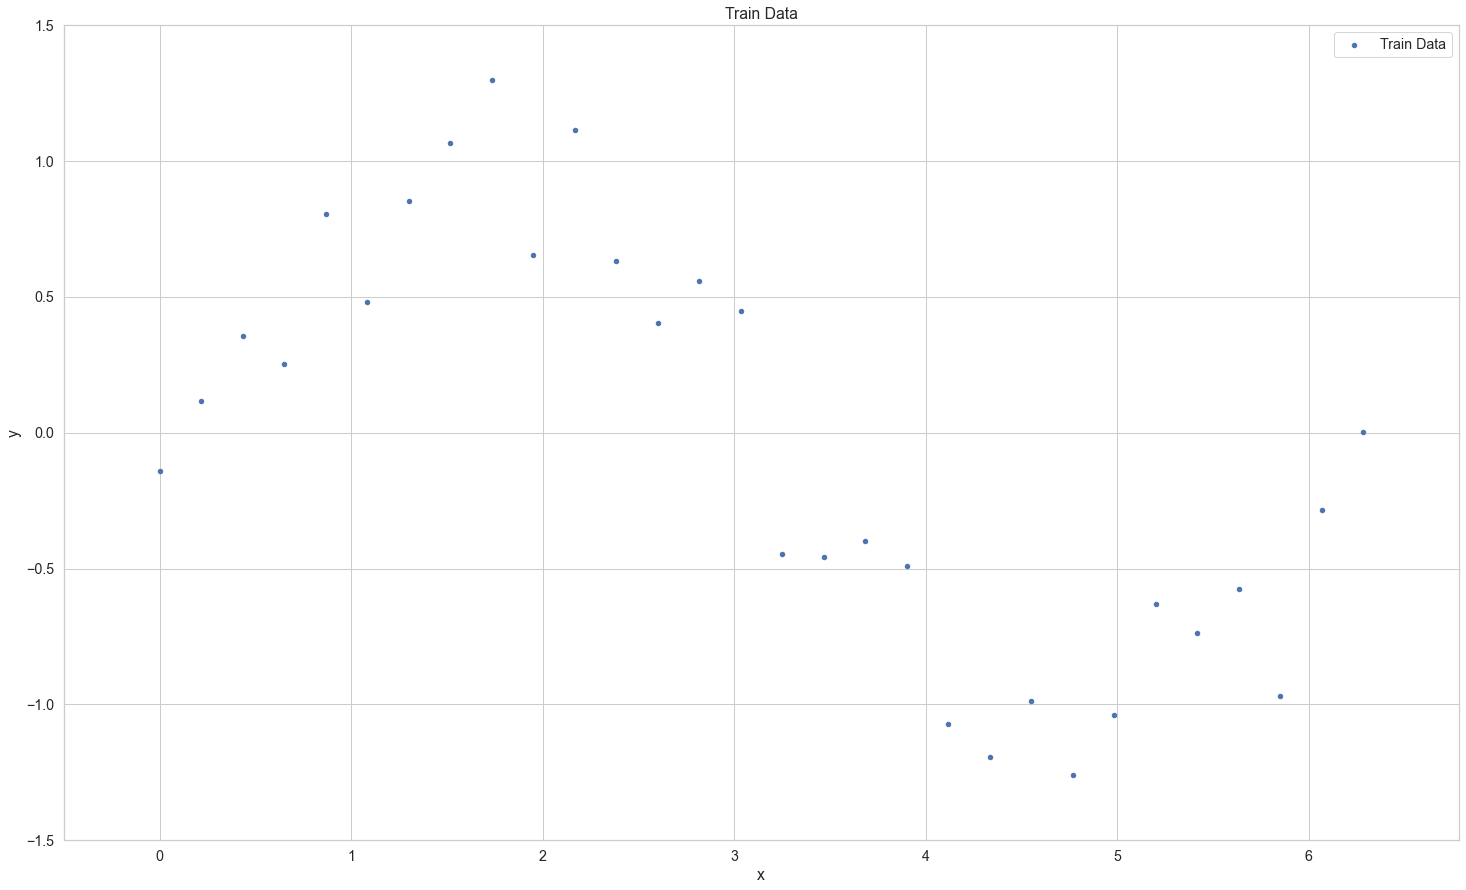

In [11]:
_ = plt.figure(figsize=fsize)
_ = plt.scatter(train.x, train.y, color='b', marker='o', s=dotsize, label='Train Data')
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('Train Data')
_ = plt.legend(loc='upper right')

### Implement Polynomial Curve Fitting

In [12]:
def error(x, y, poly):
    s = 0
    for i in range(len(y)):
        s += math.pow((y[i]-poly(x[i])), 2)
    return 0.5 * s

In [13]:
def regularized_error(x, y, poly, reg_coeff):
    s = 0
    for i in range(len(y)):
        s += math.pow((y[i]-poly(x[i])), 2)
    return 0.5 * s + 0.5 * reg_coeff * np.dot(poly, poly)

### Degree = 1

 
-0.2722 x + 0.7998
error on train:       4.403645895753136
reg. error on train:  4.407215059928129
error on test:        4.733708371790773
reg. error on test:   4.737277535965767


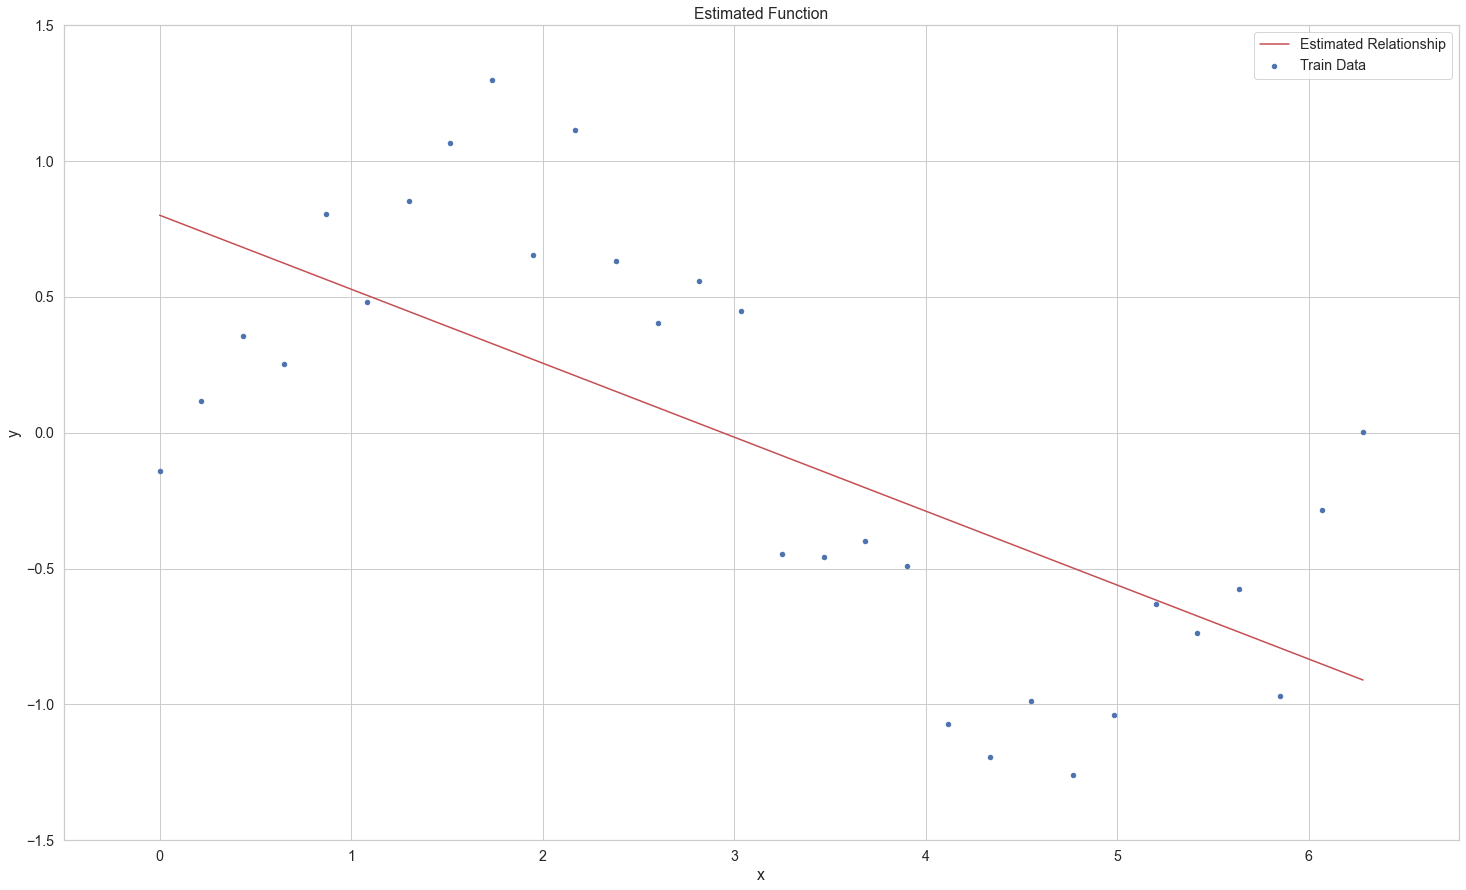

In [14]:
degree = 1
reg_coeff = 0.01

pred = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
poly = np.poly1d(np.polyfit(train.x.values, train.y.values, degree))
pred['y'] = pred.x.apply(poly)

print(poly)

print('error on train:      ', error(train.x.values, train.y.values, poly))
print('reg. error on train: ', regularized_error(train.x.values, train.y.values, poly, reg_coeff))
print('error on test:       ', error(test.x.values, test.y.values, poly))
print('reg. error on test:  ', regularized_error(test.x.values, test.y.values, poly, reg_coeff))

_ = plt.figure(figsize=fsize)
_ = plt.scatter(train.x, train.y, color='b', marker='o', s=dotsize, label='Train Data')
_ = plt.plot(pred.x, pred.y, 'r-', linewidth=linewidth, label='Estimated Relationship')
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('Estimated Function')
_ = plt.legend(loc='upper right')

 
-0.2722 x + 0.7998
error on train:       4.403645895753136
reg. error on train:  4.407215059928129
error on test:        4.733708371790773
reg. error on test:   4.737277535965767


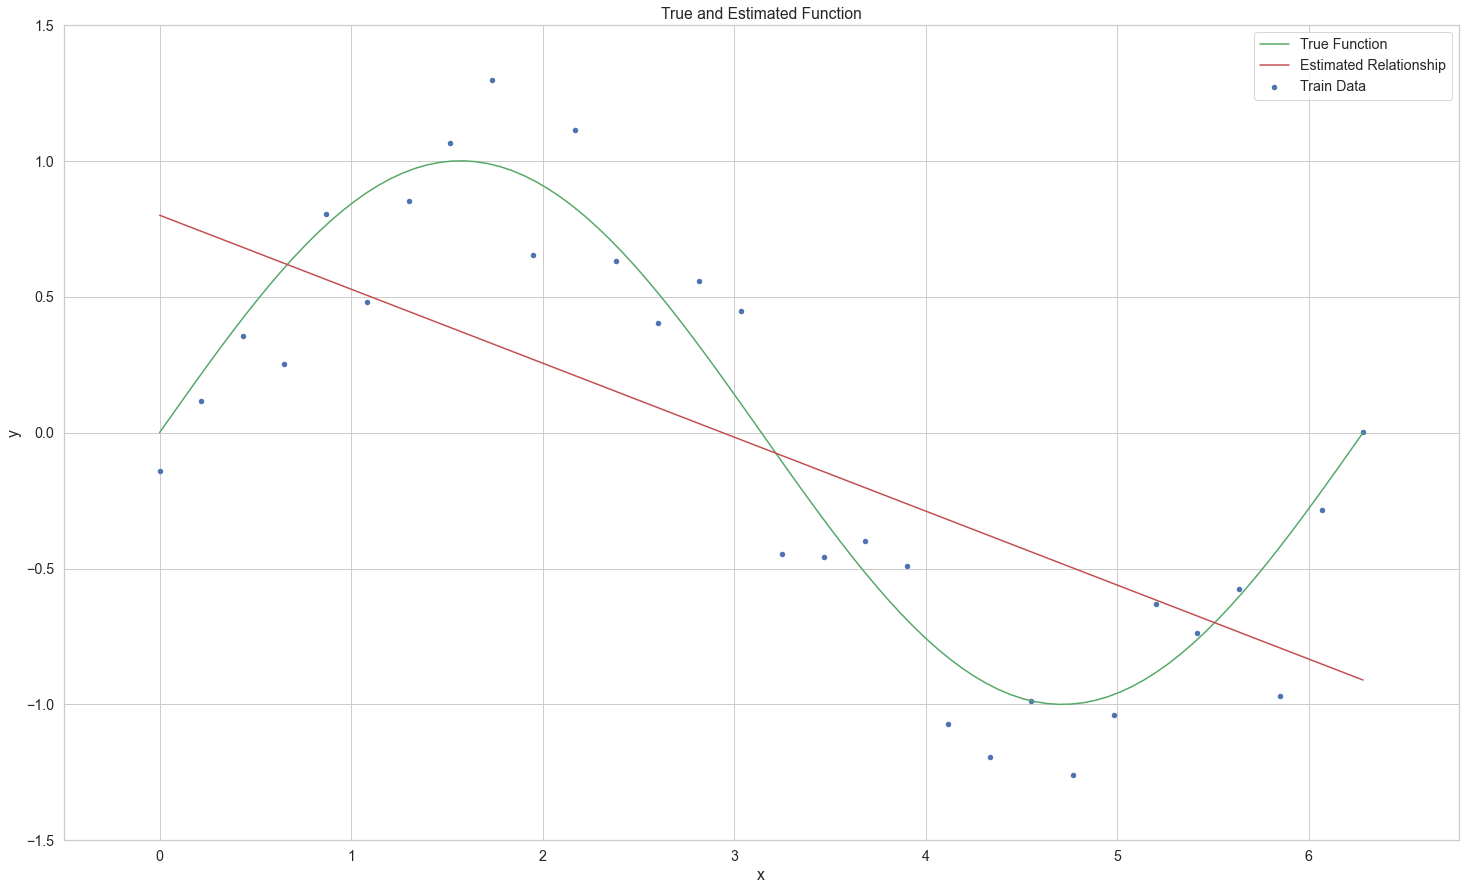

In [15]:
degree = 1
reg_coeff = 0.01

pred = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
poly = np.poly1d(np.polyfit(train.x.values, train.y.values, degree))
pred['y'] = pred.x.apply(poly)

print(poly)

print('error on train:      ', error(train.x.values, train.y.values, poly))
print('reg. error on train: ', regularized_error(train.x.values, train.y.values, poly, reg_coeff))
print('error on test:       ', error(test.x.values, test.y.values, poly))
print('reg. error on test:  ', regularized_error(test.x.values, test.y.values, poly, reg_coeff))

_ = plt.figure(figsize=fsize)
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=linewidth, label='True Function')
_ = plt.scatter(train.x, train.y, color='b', marker='o', s=dotsize, label='Train Data')
_ = plt.plot(pred.x, pred.y, 'r-', linewidth=linewidth, label='Estimated Relationship')
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True and Estimated Function')
_ = plt.legend(loc='upper right')

### Degree = 3

         3          2
0.09406 x - 0.9033 x + 2.024 x - 0.3555
error on train:       0.8434203298645997
reg. error on train:  0.8686534969221417
error on test:        0.9660198722021627
reg. error on test:   0.9912530392597046


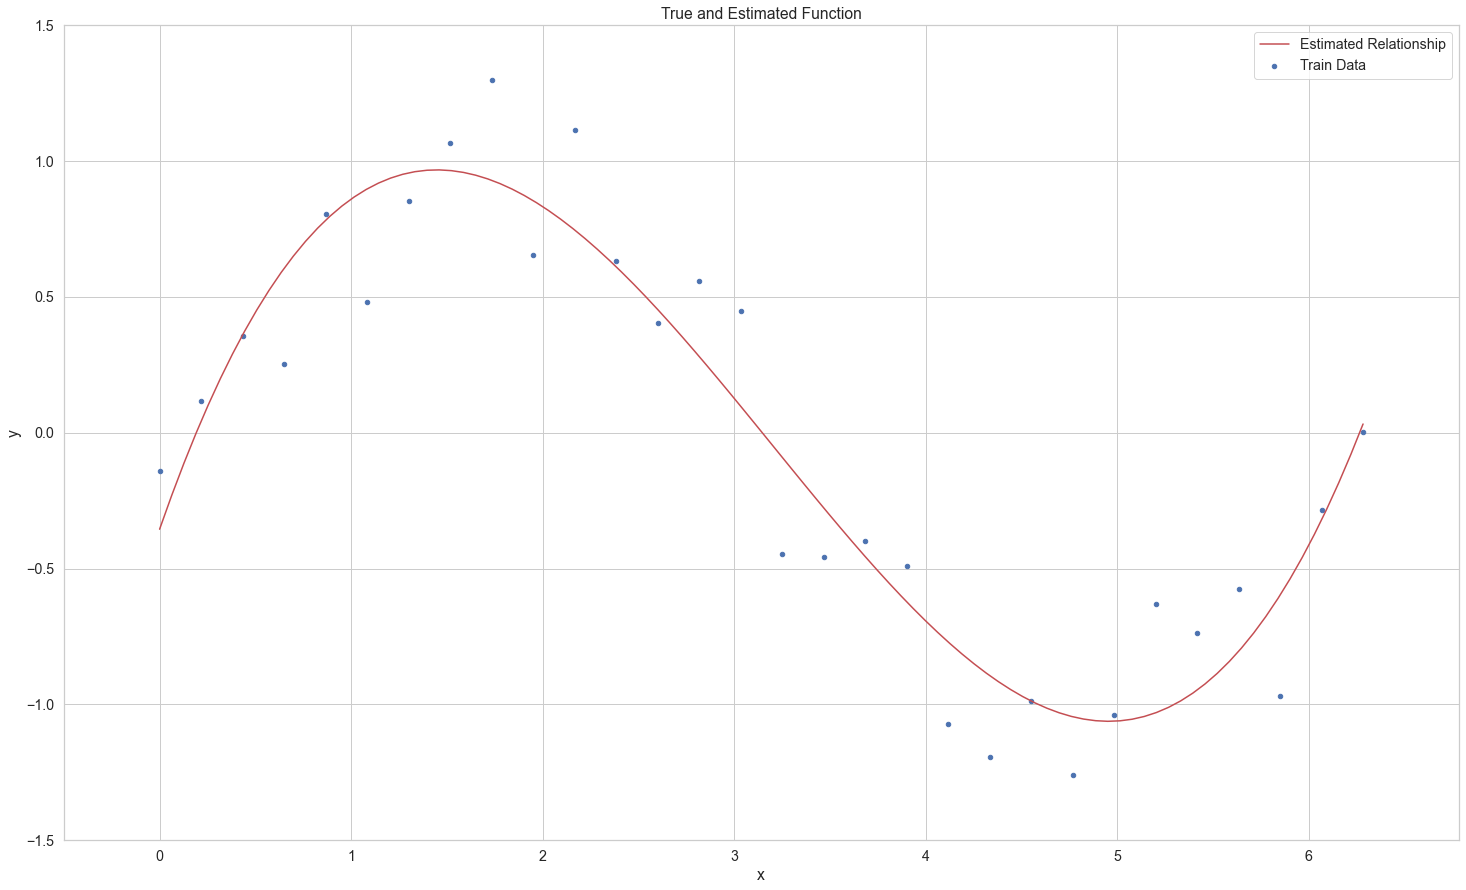

In [16]:
degree = 3
reg_coeff = 0.01

pred = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
poly = np.poly1d(np.polyfit(train.x.values, train.y.values, degree))
pred['y'] = pred.x.apply(poly)

print(poly)

print('error on train:      ', error(train.x.values, train.y.values, poly))
print('reg. error on train: ', regularized_error(train.x.values, train.y.values, poly, reg_coeff))
print('error on test:       ', error(test.x.values, test.y.values, poly))
print('reg. error on test:  ', regularized_error(test.x.values, test.y.values, poly, reg_coeff))

_ = plt.figure(figsize=fsize)
_ = plt.scatter(train.x, train.y, color='b', marker='o', s=dotsize, label='Train Data')
_ = plt.plot(pred.x, pred.y, 'r-', linewidth=linewidth, label='Estimated Relationship')
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True and Estimated Function')
_ = plt.legend(loc='upper right')

         3          2
0.09406 x - 0.9033 x + 2.024 x - 0.3555
error on train:       0.8434203298645997
reg. error on train:  0.8686534969221417
error on test:        0.9660198722021627
reg. error on test:   0.9912530392597046


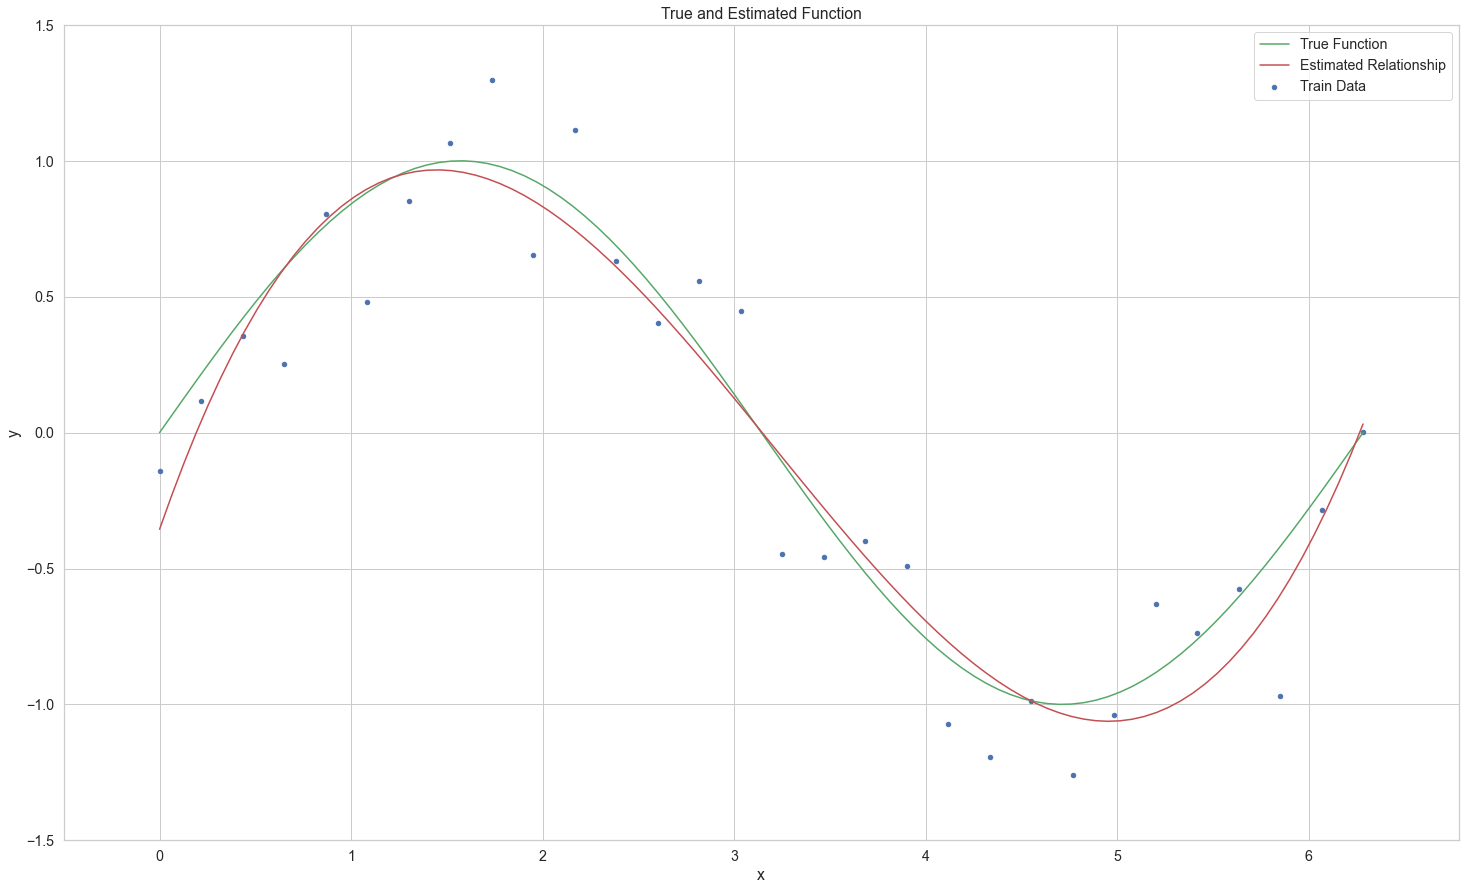

In [17]:
degree = 3
reg_coeff = 0.01

pred = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
poly = np.poly1d(np.polyfit(train.x.values, train.y.values, degree))
pred['y'] = pred.x.apply(poly)

print(poly)

print('error on train:      ', error(train.x.values, train.y.values, poly))
print('reg. error on train: ', regularized_error(train.x.values, train.y.values, poly, reg_coeff))
print('error on test:       ', error(test.x.values, test.y.values, poly))
print('reg. error on test:  ', regularized_error(test.x.values, test.y.values, poly, reg_coeff))

_ = plt.figure(figsize=fsize)
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=linewidth, label='True Function')
_ = plt.scatter(train.x, train.y, color='b', marker='o', s=dotsize, label='Train Data')
_ = plt.plot(pred.x, pred.y, 'r-', linewidth=linewidth, label='Estimated Relationship')
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True and Estimated Function')
_ = plt.legend(loc='upper right')

### Degree = 9

           15            14           13          12         11
2.135e-05 x  - 0.001048 x  + 0.02309 x  - 0.3015 x  + 2.598 x 
          10         9         8         7         6         5
 - 15.55 x  + 66.35 x - 203.5 x + 447.1 x - 692.8 x + 735.9 x
          4         3         2
 - 512.3 x + 217.9 x - 50.67 x + 5.884 x - 0.1418
error on train:       0.45143823929323695
reg. error on train:  7900.494021156223
error on test:        0.8034868025482874
reg. error on test:   7900.846069719478


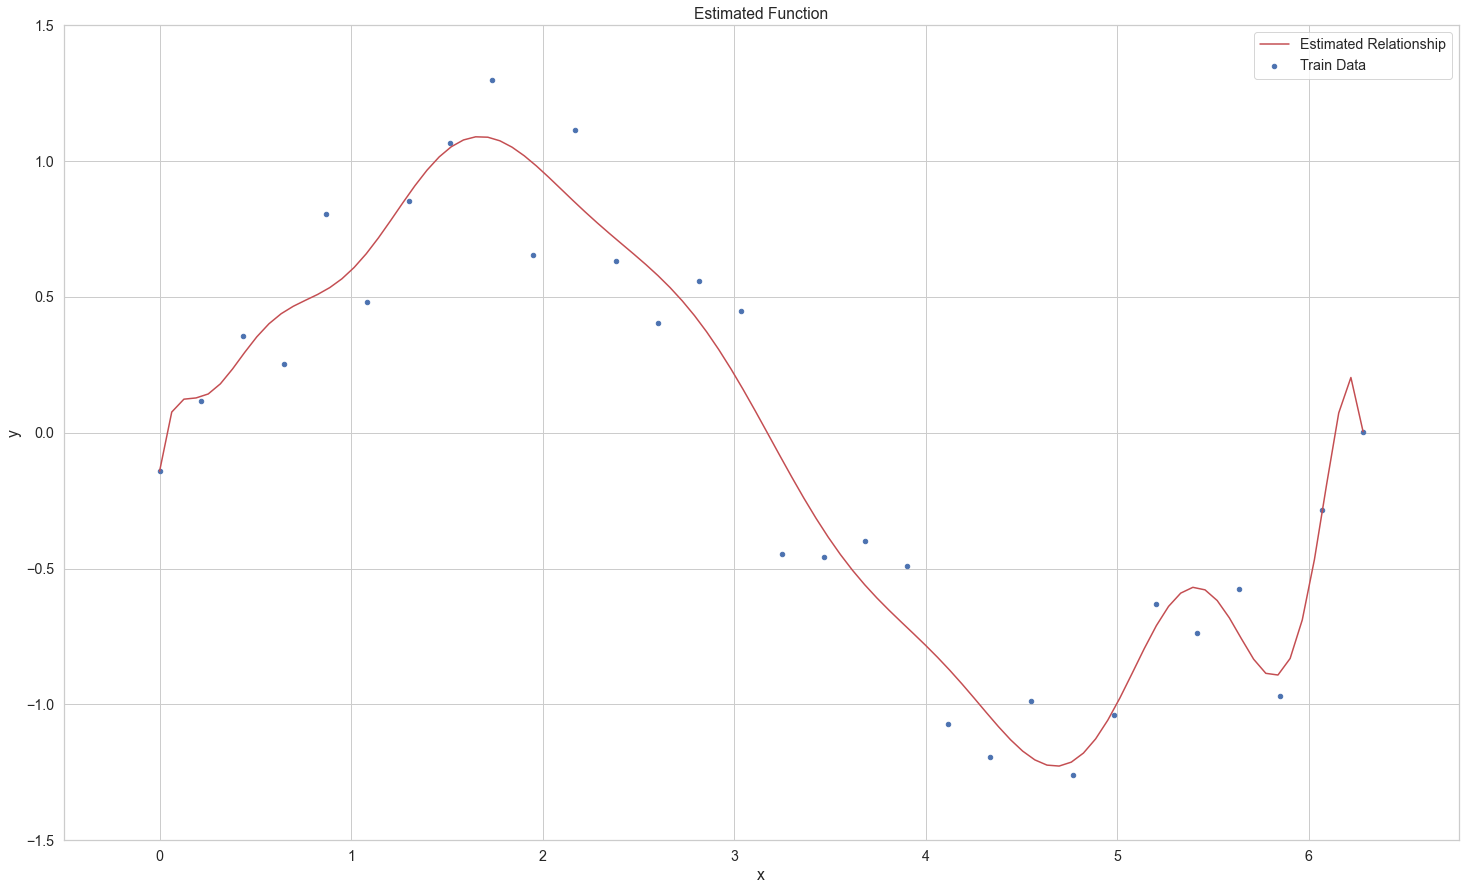

In [18]:
degree = 15
reg_coeff = 0.01

pred = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
poly = np.poly1d(np.polyfit(train.x.values, train.y.values, degree))
pred['y'] = pred.x.apply(poly)

print(poly)

print('error on train:      ', error(train.x.values, train.y.values, poly))
print('reg. error on train: ', regularized_error(train.x.values, train.y.values, poly, reg_coeff))
print('error on test:       ', error(test.x.values, test.y.values, poly))
print('reg. error on test:  ', regularized_error(test.x.values, test.y.values, poly, reg_coeff))

_ = plt.figure(figsize=fsize)
_ = plt.scatter(train.x, train.y, color='b', marker='o', s=dotsize, label='Train Data')
_ = plt.plot(pred.x, pred.y, 'r-', linewidth=linewidth, label='Estimated Relationship')
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('Estimated Function')
_ = plt.legend(loc='upper right')

           15            14           13          12         11
2.135e-05 x  - 0.001048 x  + 0.02309 x  - 0.3015 x  + 2.598 x 
          10         9         8         7         6         5
 - 15.55 x  + 66.35 x - 203.5 x + 447.1 x - 692.8 x + 735.9 x
          4         3         2
 - 512.3 x + 217.9 x - 50.67 x + 5.884 x - 0.1418
error on train:       0.45143823929323695
reg. error on train:  7900.494021156223
error on test:        0.8034868025482874
reg. error on test:   7900.846069719478


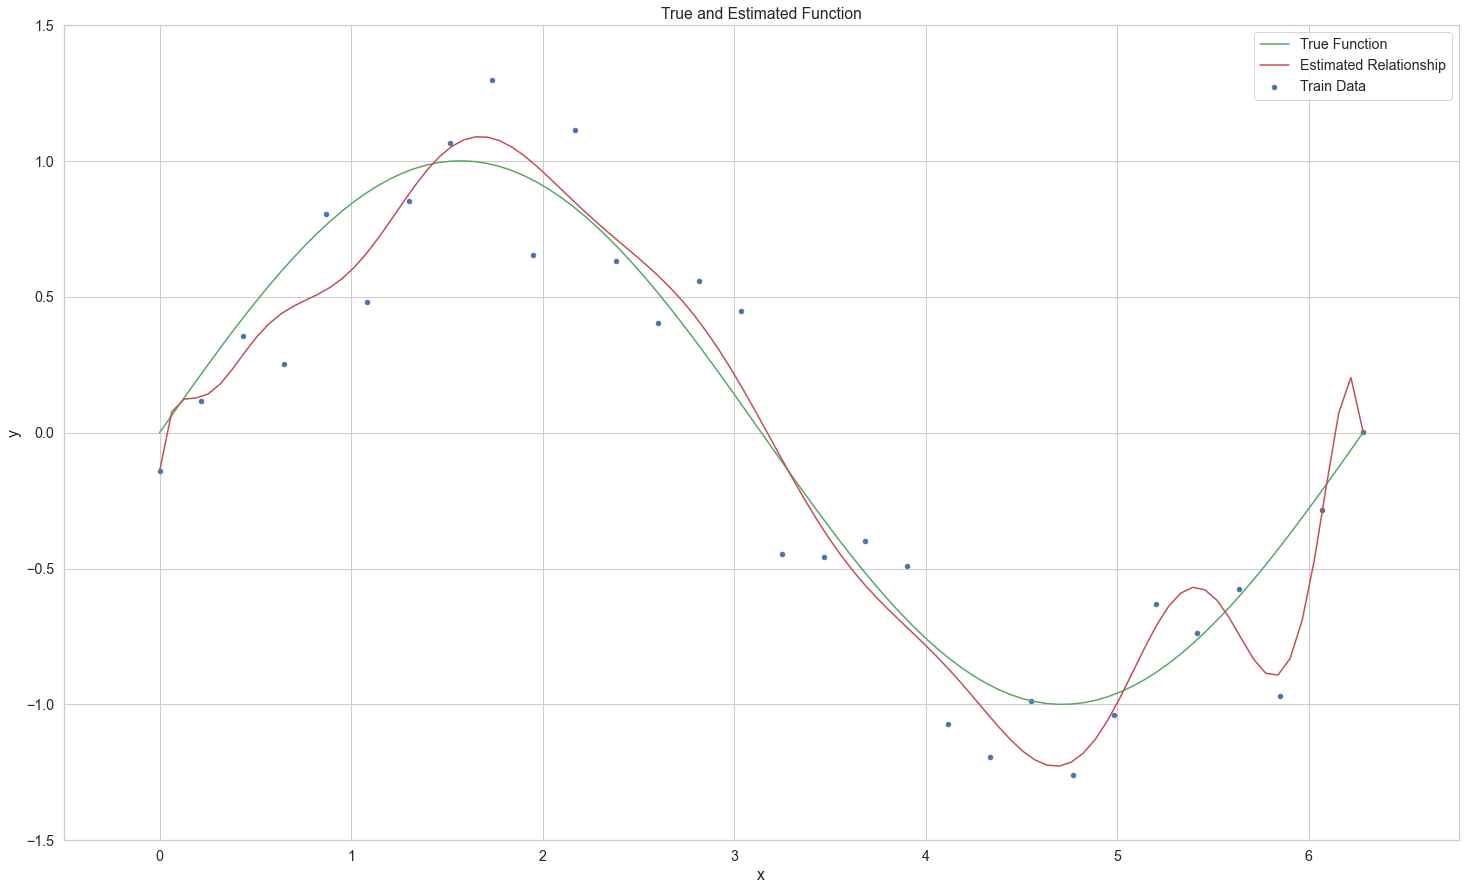

In [19]:
degree = 15
reg_coeff = 0.01

pred = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
poly = np.poly1d(np.polyfit(train.x.values, train.y.values, degree))
pred['y'] = pred.x.apply(poly)

print(poly)

print('error on train:      ', error(train.x.values, train.y.values, poly))
print('reg. error on train: ', regularized_error(train.x.values, train.y.values, poly, reg_coeff))
print('error on test:       ', error(test.x.values, test.y.values, poly))
print('reg. error on test:  ', regularized_error(test.x.values, test.y.values, poly, reg_coeff))

_ = plt.figure(figsize=fsize)
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=linewidth, label='True Function')
_ = plt.scatter(train.x, train.y, color='b', marker='o', s=dotsize, label='Train Data')
_ = plt.plot(pred.x, pred.y, 'r-', linewidth=linewidth, label='Estimated Relationship')
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True and Estimated Function')
_ = plt.legend(loc='upper right')